# IEEE-CIS Fraud Detection
## Can you detect fraud from customer transactions?

In [27]:
# Análise dos dados
import pandas as pd

# Valores faltantes
import missingno as mno
# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sn

### SampleSubmission é o formato de entrega do modelo. Desconsiderar Dataset.

In [ ]:
df_SampleSubmission = pd.read_csv('sample_submission.csv')

In [ ]:
df_SampleSubmission.head()

### Analisando o dataset test_identity.csv

Metadados
Identity Table
Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
DeviceType
DeviceInfo
id_12 - id_38

DeviceInfo : https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#583227

“id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C. I hope you could get basic meaning of these features, and by mentioning them as numerical/categorical, you won't deal with them inappropriately.”

In [2]:
df_test_identity = pd.read_csv('test_identity.csv')

In [14]:
l, c = df_test_identity.shape

In [15]:
l

141907

In [4]:
df_test_identity.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [ ]:
df_test_identity.tail()

In [5]:
df_test_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  141907 non-null  int64  
 1   id-01          141907 non-null  float64
 2   id-02          136976 non-null  float64
 3   id-03          66481 non-null   float64
 4   id-04          66481 non-null   float64
 5   id-05          134750 non-null  float64
 6   id-06          134750 non-null  float64
 7   id-07          5059 non-null    float64
 8   id-08          5059 non-null    float64
 9   id-09          74338 non-null   float64
 10  id-10          74338 non-null   float64
 11  id-11          136778 non-null  float64
 12  id-12          141907 non-null  object 
 13  id-13          130286 non-null  float64
 14  id-14          71357 non-null   float64
 15  id-15          136977 non-null  object 
 16  id-16          125747 non-null  object 
 17  id-17          135966 non-nul

In [6]:
pd.get_option("display.max_columns")

20

In [8]:
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head
df_test_identity.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [9]:
df_test_identity.columns

Index(['TransactionID', 'id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06',
       'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-12', 'id-13', 'id-14',
       'id-15', 'id-16', 'id-17', 'id-18', 'id-19', 'id-20', 'id-21', 'id-22',
       'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-28', 'id-29', 'id-30',
       'id-31', 'id-32', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [22]:
# Ideia pessoal para analisar coluna a coluna (noob)
for c in df_test_identity.columns:
    print(c, end=' / '),
    print(df_test_identity[c].nunique(), ' / ', l )

TransactionID / 141907  /  141907
id-01 / 80  /  141907
id-02 / 114868  /  141907
id-03 / 22  /  141907
id-04 / 15  /  141907
id-05 / 90  /  141907
id-06 / 101  /  141907
id-07 / 81  /  141907
id-08 / 90  /  141907
id-09 / 38  /  141907
id-10 / 52  /  141907
id-11 / 301  /  141907
id-12 / 2  /  141907
id-13 / 27  /  141907
id-14 / 27  /  141907
id-15 / 3  /  141907
id-16 / 2  /  141907
id-17 / 103  /  141907
id-18 / 17  /  141907
id-19 / 502  /  141907
id-20 / 436  /  141907
id-21 / 443  /  141907
id-22 / 26  /  141907
id-23 / 3  /  141907
id-24 / 15  /  141907
id-25 / 309  /  141907
id-26 / 94  /  141907
id-27 / 2  /  141907
id-28 / 2  /  141907
id-29 / 2  /  141907
id-30 / 86  /  141907
id-31 / 135  /  141907
id-32 / 5  /  141907
id-33 / 390  /  141907
id-34 / 2  /  141907
id-35 / 2  /  141907
id-36 / 2  /  141907
id-37 / 2  /  141907
id-38 / 2  /  141907
DeviceType / 2  /  141907
DeviceInfo / 2226  /  141907


In [23]:
# Ideia sugerida no forum de discussão da competição por um dos competidores (pro)
for col, values in df_test_identity.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 141907
[3663586 3663588 3663597 ... 4170234 4170236 4170239]


id-01: 80
[ -45.    0.   -5.  -95.  -10.  -20.  -15.  -40.  -25. -100.  -60.  -50.
  -35.  -30.  -75.  -80.  -29.  -18.  -90.  -17.  -32.  -16.  -21.  -19.
  -55.  -12.  -31.   -6.  -26.  -85.  -34.  -33.  -65.  -70.  -11.  -61.
  -51.  -38.  -28.  -43.  -27.  -78.  -57.  -47.  -76.   -7.  -66.  -14.
  -91.  -22.  -92.  -13.  -64.  -88.  -62.  -46.   -9.   -8.  -23.  -36.
  -72.  -52.  -63.  -39.  -42.  -71.  -56.  -58.  -44.  -54.  -73.  -49.
  -69.  -41.  -84.  -83.  -77.  -93.  -48.  -96.]


id-02: 114868
[280290.   3579. 185210. ... 489917. 266704. 692090.]


id-03: 22
[ nan   0.  -7.   1.  -2.  -5.   2.   3.  -6.   4.   6.   5. -10.  -4.
  -8.  -9.  -1.  -3. -12. -11.  11.   7.   9.]


id-04: 15
[ nan   0. -11.  -7.  -6.  -5.  -8. -13. -12.  -4.  -2.  -9. -10.  -1.
  -3. -19.]


id-05: 90
[  0.   1.   7.   4.   2. -10.  -9.  nan   5.  -6. -27.  -1.  13.   3.
  15.   8.   6. -12.  14.  -8.  23.  24.  21. 

['New' 'Found' nan]


id-29: 2
['NotFound' 'Found' nan]


id-30: 86
[nan 'Android 6.0.1' 'iOS 11.4.0' 'Windows 7' 'iOS 10.1.1' 'Windows 10'
 'Mac OS X 10_13_5' 'iOS 11.3.0' 'Linux' 'Android 5.1.1' 'iOS 9.3.5'
 'Android 7.0' 'iOS 11.2.6' 'Mac OS X 10.13' 'Android 8.0.0' 'Windows 8.1'
 'Android' 'Mac OS X 10_12_6' 'iOS 10.3.3' 'Mac' 'Windows 8'
 'Mac OS X 10_9_5' 'Android 7.1.1' 'iOS 11.1.1' 'Android 8.1.0'
 'iOS 11.2.5' 'Mac OS X 10_11_6' 'Android 9' 'Mac OS X 10_10_5'
 'iOS 11.2.2' 'iOS 11.3.1' 'Windows Vista' 'Windows XP' 'Mac OS X 10.11'
 'Mac OS X 10_8_5' 'Mac OS X 10_13_4' 'iOS 10.3.2' 'iOS 11.2.1'
 'iOS 12.0.0' 'Mac OS X 10_13_1' 'iOS 10.0.2' 'Mac OS X 10_7_5'
 'iOS 11.1.2' 'Mac OS X 10_12_1' 'Mac OS X 10_13_3' 'iOS 11.0.1'
 'Android 6.0' 'iOS 10.2.1' 'iOS' 'Mac OS X 10.12' 'Mac OS X 10_13_2'
 'Mac OS X 10_11_5' 'Mac OS X 10_12_5' 'Mac OS X 10_13_6' 'Mac OS X 10.14'
 'Mac OS X 10_14_0' 'Mac OS X 10_11_3' 'iOS 10.3.1' 'iOS 11.4.1'
 'Mac OS X 10_12_4' 'func' 'Mac OS X 10.10' 'iOS 10

['F' 'T' nan]


id-36: 2
['F' 'T' nan]


id-37: 2
['T' 'F' nan]


id-38: 2
['F' 'T' nan]


DeviceType: 2
['mobile' 'desktop' nan]


DeviceInfo: 2226
['MYA-L13 Build/HUAWEIMYA-L13' 'LGLS676 Build/MXB48T' 'Trident/7.0' ...
 'LG-V700' 'STV100-1' 'Alcatel_5098O']




<AxesSubplot:>

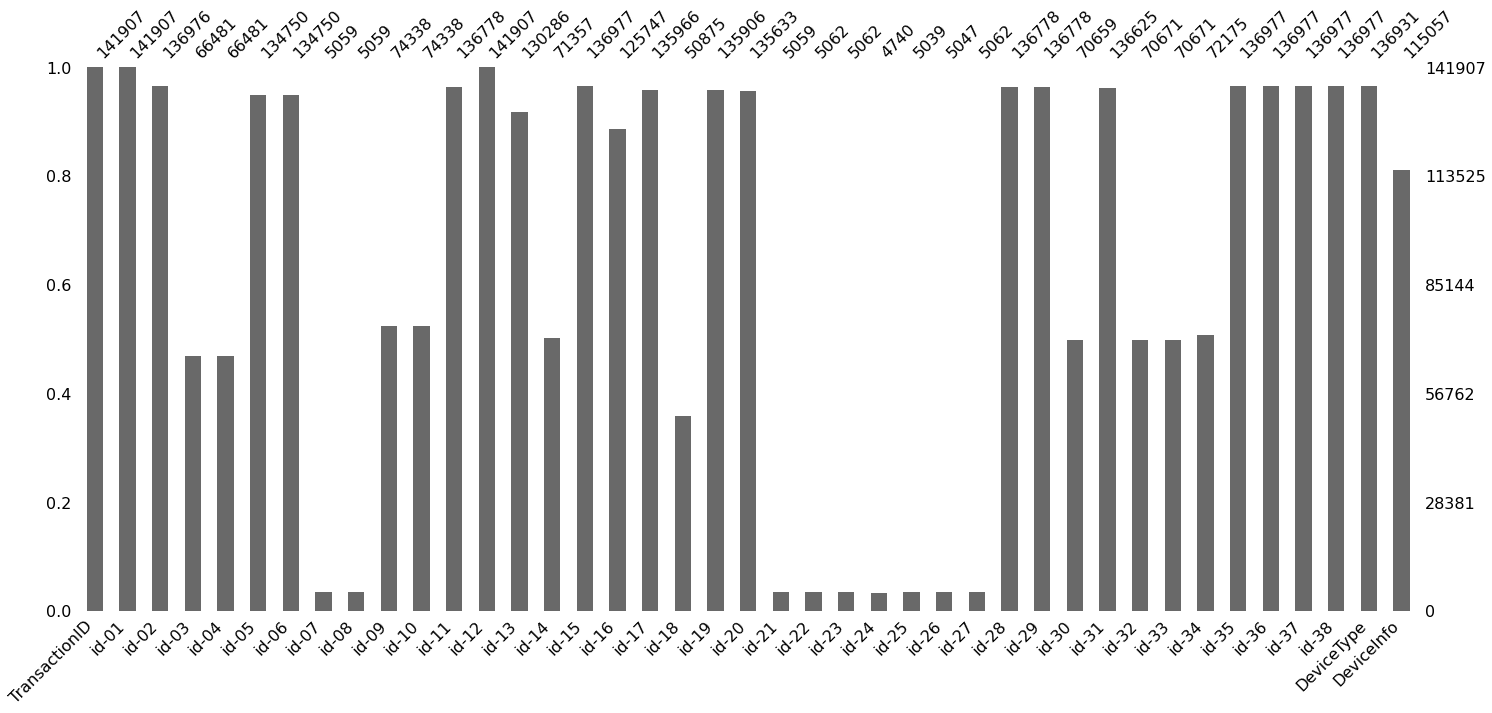

In [28]:
mno.bar(df_test_identity)

In [ ]:
df_test_identity.isnull().sum().sort_values(ascending=False)

In [ ]:
(df_test_identity.isnull().sum().sort_values(ascending=False) / l) * 100

In [29]:
df_test_identity_corr = df_test_identity.corr()

<AxesSubplot:>

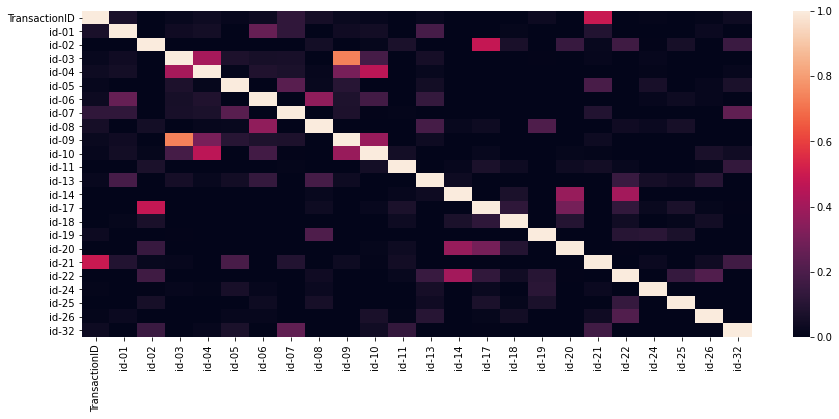

In [34]:
plt.figure(figsize=(15,6))
sn.heatmap(df_test_identity_corr, vmin=0, vmax=1)

<AxesSubplot:>

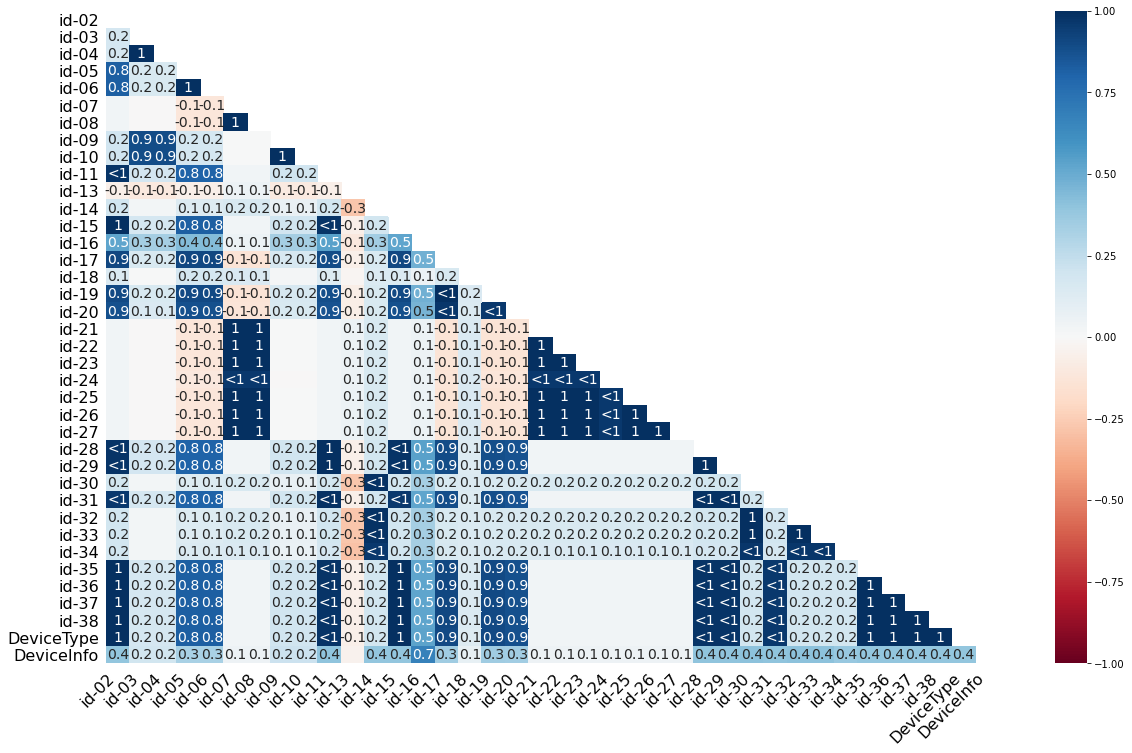

In [35]:
mno.heatmap(df_test_identity)

Analisando Dados Faltantes identity

In [47]:
n_nan_id = df_test_identity.isna().sum()

<AxesSubplot:>

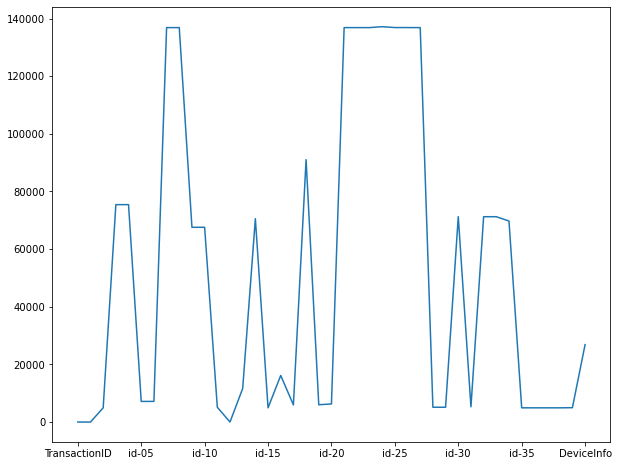

In [48]:
plt.figure(figsize=(10,8))
n_nan_id.plot()

### Analisando o dataset test_transaction.csv

Transaction table
“It contains money transfer and also other gifting goods and service, like you booked a ticket for others, etc.”

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
“TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.”

TransactionAMT: transaction payment amount in USD
“Some of the transaction amounts have three decimal places to the right of the decimal point. There seems to be a link to three decimal places and a blank addr1 and addr2 field. Is it possible that these are foreign transactions and that, for example, the 75.887 in row 12 is the result of multiplying a foreign currency amount by an exchange rate?”

ProductCD: product code, the product for each transaction
“Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.”

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address
“both addresses are for purchaser
addr1 as billing region
addr2 as billing country”
dist: distance
"distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”
P_ and (R__) emaildomain: purchaser and recipient email domain
“ certain transactions don't need recipient, so R_emaildomain is null.”
C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
“Can you please give more examples of counts in the variables C1-15? Would these be like counts of phone numbers, email addresses, names associated with the user? I can't think of 15.
Your guess is good, plus like device, ipaddr, billingaddr, etc. Also these are for both purchaser and recipient, which doubles the number.”
D1-D15: timedelta, such as days between previous transaction, etc.
M1-M9: match, such as names on card and address, etc.
Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
“For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time range, etc.”
"All Vesta features were derived as numerical. some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking). I wouldn't recommend to treat any of them as categorical. If any of them resulted in binary by chance, it maybe worth trying."

In [36]:
df_test_transaction = pd.read_csv('test_transaction.csv')

In [37]:
df_test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,T,F,F,M0,NaN,F,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [38]:
l2, c2 = df_test_transaction.shape

In [39]:
df_test_transaction.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Data columns (total 393 columns):
 #    Column          Dtype  
---   ------          -----  
 0    TransactionID   int64  
 1    TransactionDT   int64  
 2    TransactionAmt  float64
 3    ProductCD       object 
 4    card1           int64  
 5    card2           float64
 6    card3           float64
 7    card4           object 
 8    card5           float64
 9    card6           object 
 10   addr1           float64
 11   addr2           float64
 12   dist1           float64
 13   dist2           float64
 14   P_emaildomain   object 
 15   R_emaildomain   object 
 16   C1              float64
 17   C2              float64
 18   C3              float64
 19   C4              float64
 20   C5              float64
 21   C6              float64
 22   C7              float64
 23   C8              float64
 24   C9              float64
 25   C10             float64
 26   C11             float64
 27   C12         

In [ ]:
# Para visualizar todas as colunas (antes de conhecer o atributo 'verbose'), criei uma Serie com o nome das colunas
df_test_transactionColumns = pd.Series(df_test_transaction.columns)

In [ ]:
df_test_transactionColumns

In [ ]:
# A ideia era expandir as colunas ao máximo, pois ao visualizar a serie acima os dados permaneceram truncados
pd.set_option('display.max_columns', None)

In [ ]:
# Dai lembrei do Método unique
df_test_transactionColumns.unique()

In [ ]:
df_test_transaction.isnull().sum().sort_values(ascending=False)

In [ ]:
df_test_transaction_corr = df_test_transaction.corr()

In [ ]:
# Tá o caos
plt.figure(figsize=(15,8))
sn.heatmap(df_test_transaction_corr, vmin=0, vmax=1)
plt.show()

<AxesSubplot:>

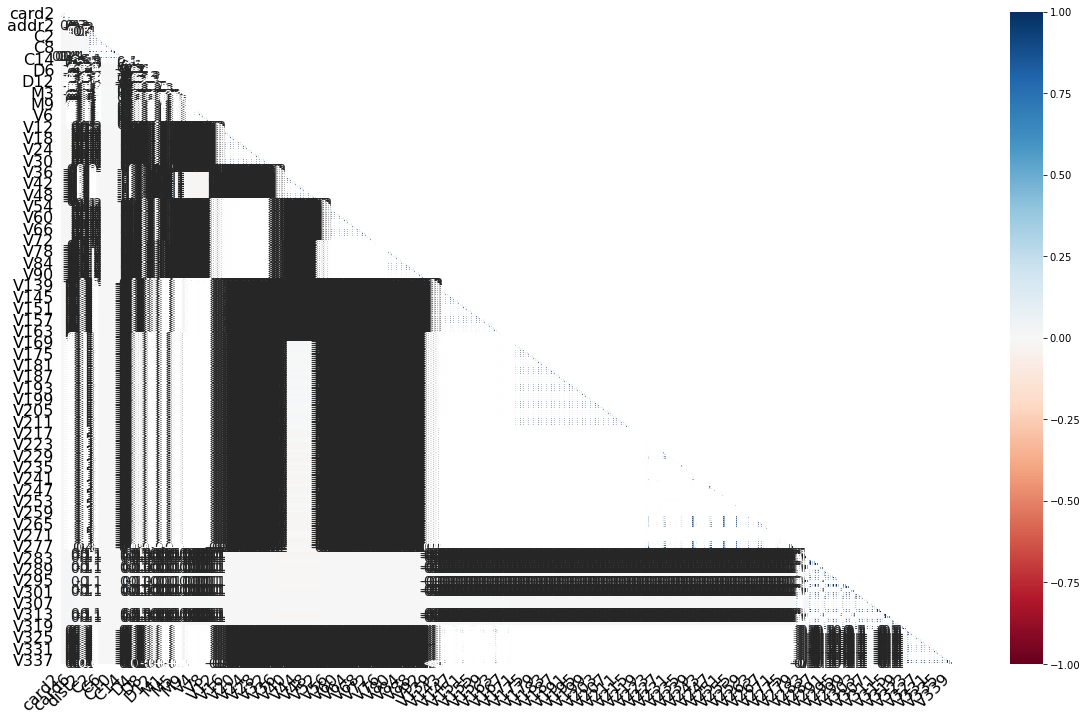

In [40]:
plt.figure(figsize=(15,8))
mno.heatmap(df_test_transaction)

In [41]:
for col, values in df_test_transaction.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 506691
[3663549 3663550 3663551 ... 4170237 4170238 4170239]


TransactionDT: 494686
[18403224 18403263 18403310 ... 34214326 34214337 34214345]


TransactionAmt: 14119
[ 31.95   49.    171.    ... 186.161 136.117  59.912]


ProductCD: 5
['W' 'C' 'S' 'H' 'R']


card1: 13244
[10409  4272  4476 ...  4126  1350  3644]


card2: 497
[111. 574. 360. 452. 321. 476. 170. 100. 127. 225. 215. 481. 230. 194.
 555. 206. 490. 514. 279. 548. 545. 399. 171. 583. 269. 130. 174. 361.
 264. 160. 453. 298. 113. 381. 122.  nan 108. 161. 543. 559. 532. 553.
 142. 427. 445. 494. 259. 276. 567. 268. 512. 408. 304. 375. 181. 513.
 550. 455. 484. 309. 571. 103. 204. 231. 393. 516. 398. 175. 454. 104.
 535. 489. 254. 193. 105. 474. 572. 143. 134. 270. 346. 562. 299. 459.
 390. 202. 310. 327. 470. 157. 229. 325. 306. 549. 158. 391. 431. 205.
 210. 368. 297. 401. 428. 369. 271. 462. 244. 492. 145. 496. 223. 418.
 172. 436. 216. 262. 183. 498. 114. 250. 133. 128. 378. 350. 148. 527.
 115. 529. 479. 

C7: 518
[0.000e+00 1.000e+00 3.000e+00 4.000e+00 2.000e+00 3.000e+01 5.000e+00
 2.200e+01 2.300e+01 7.000e+00 6.000e+00 2.400e+01 2.700e+01 2.000e+01
 2.100e+01 5.800e+01 3.100e+01 4.500e+01 5.600e+01 5.700e+01 1.240e+02
 2.800e+01 2.500e+01 8.000e+00 9.000e+00 1.000e+01 1.700e+01 6.200e+01
 1.250e+02 1.300e+01 1.100e+01 1.200e+01 1.900e+01 9.400e+01 2.900e+01
 1.400e+01 1.500e+01 6.300e+01 5.900e+01 4.400e+01 1.260e+02 3.200e+01
 6.400e+01 6.500e+01 1.600e+01 6.600e+01 2.600e+01 6.700e+01 3.300e+01
 3.400e+01 3.500e+01 1.270e+02 1.800e+01 1.290e+02 6.800e+01 1.300e+02
 9.200e+01 3.600e+01 6.900e+01 7.000e+01 4.700e+01 9.700e+01 6.000e+01
 3.700e+01 3.800e+01 9.300e+01 3.900e+01 9.000e+01 7.400e+01 8.700e+01
 4.000e+01 7.500e+01 4.100e+01 1.200e+02 7.600e+01 4.200e+01 4.300e+01
 1.210e+02 9.600e+01 7.700e+01 9.800e+01 8.900e+01 1.190e+02 5.400e+01
 1.010e+02 1.020e+02 6.100e+01 4.600e+01 5.300e+01 5.500e+01 5.100e+01
 8.800e+01 7.300e+01 1.410e+02 1.440e+02 1.460e+02 1.540e+02 8.600e+0

[1.000e+00 0.000e+00 3.000e+00 1.100e+01 2.000e+00 3.700e+01 5.000e+00
 6.000e+00 9.000e+00 4.000e+00 8.000e+00 1.800e+01 7.100e+01 7.000e+00
 3.600e+01 7.200e+01 2.070e+02 4.000e+01 5.700e+01 8.100e+01 2.060e+02
 1.630e+02 1.200e+01 2.080e+02 1.000e+01 2.090e+02 1.600e+01 1.700e+01
 1.900e+01 2.000e+01 2.900e+01 8.200e+01 1.300e+01 8.300e+01 8.500e+01
 1.640e+02 2.100e+02 1.400e+01 2.110e+02 6.800e+01 2.120e+02 2.800e+01
 2.130e+02 3.800e+01 3.400e+01 8.800e+01 9.400e+01 4.700e+01 2.140e+02
 2.150e+02 2.160e+02 2.170e+02 2.180e+02 2.190e+02 2.200e+02 2.210e+02
 1.650e+02 8.900e+01 9.000e+01 2.220e+02 2.230e+02 2.240e+02 9.100e+01
 9.200e+01 9.300e+01 2.250e+02 9.500e+01 2.260e+02 2.270e+02 2.280e+02
 2.290e+02 1.500e+01 2.300e+02 2.310e+02 2.320e+02 2.330e+02 2.100e+01
 2.200e+01 1.660e+02 1.670e+02 4.800e+01 3.900e+01 1.700e+02 6.100e+01
 9.600e+01 9.700e+01 1.730e+02 6.200e+01 2.700e+01 9.800e+01 9.900e+01
 4.100e+01 1.000e+02 6.300e+01 4.900e+01 2.300e+01 2.400e+01 2.500e+01
 2.340

[2.700e+01 7.000e+00 1.000e+01 4.100e+01 0.000e+00       nan 4.000e+00
 1.300e+01 5.740e+02 2.730e+02 5.800e+01 5.000e+00 1.570e+02 1.700e+01
 1.160e+02 2.000e+01 2.000e+00 6.800e+01 3.100e+01 2.880e+02 1.400e+01
 2.280e+02 9.400e+01 3.000e+00 9.000e+00 3.500e+01 1.100e+01 4.300e+01
 4.000e+01 1.000e+00 2.400e+01 2.800e+01 1.600e+01 1.310e+02 5.900e+01
 1.900e+01 1.070e+02 4.330e+02 6.000e+00 3.610e+02 1.470e+02 2.500e+01
 3.700e+01 3.200e+01 8.000e+00 6.200e+01 3.900e+01 8.600e+01 8.300e+01
 7.400e+01 3.000e+01 4.200e+01 2.900e+01 2.300e+01 8.100e+01 1.770e+02
 2.600e+01 1.210e+02 1.220e+02 1.800e+01 1.200e+01 7.500e+01 1.490e+02
 9.300e+01 5.700e+01 2.620e+02 1.040e+02 1.500e+01 1.030e+02 1.830e+02
 3.020e+02 5.300e+01 4.570e+02 2.240e+02 7.900e+01 3.800e+01 5.500e+01
 1.150e+02 4.220e+02 7.100e+01 4.170e+02 1.520e+02 2.350e+02 6.470e+02
 5.360e+02 4.900e+01 6.000e+01 1.360e+02 2.100e+01 1.290e+02 1.800e+02
 1.230e+02 4.800e+01 6.100e+01 4.700e+01 6.320e+02 4.050e+02 6.150e+02
 3.600

D14: 1031
[ nan   0.  30. ... 818. 849. 858.]


D15: 1078
[ 409.  634.   97. ... 1010. 1091. 1089.]


M1: 2
['T' nan 'F']


M2: 2
['T' 'F' nan]


M3: 2
['F' 'T' nan]


M4: 3
[nan 'M0' 'M1' 'M2']


M5: 2
[nan 'F' 'T']


M6: 2
['F' 'T' nan]


M7: 2
['T' nan 'F']


M8: 2
['T' nan 'F']


M9: 2
['T' nan 'F']


V1: 2
[ 1. nan  0.]


V2: 12
[ 1. nan  2.  3.  0.  5.  4.  6. 10.  7.  9. 11.  8.]


V3: 12
[ 1. nan  2.  3.  0.  5.  4.  7.  6. 10.  9. 11.  8.]


V4: 10
[ 1.  0. nan  2.  3.  4.  5.  6. 10.  8.  9.]


V5: 11
[ 1.  0. nan  2.  4.  3.  5.  6. 10.  8.  9.  7.]


V6: 13
[ 1.  2. nan  3.  4.  6.  5. 11.  7.  8. 10. 12. 13.  0.]


V7: 13
[ 1.  2. nan  3.  4.  5.  6.  7. 11.  8. 10. 12. 13.  0.]


V8: 12
[ 1. nan  2.  3.  4.  5.  6.  0. 10.  7.  9. 11.  8.]


V9: 12
[ 1. nan  2.  3.  4.  5.  6.  7.  0. 10.  9. 11.  8.]


V10: 6
[ 1.  0. nan  2.  3.  4.  5.]


V11: 8
[ 1.  0. nan  2.  3.  4.  5.  6.  7.]


V12: 5
[ 0.  1. nan  2.  3.  4.]


V13: 7
[ 0.  1. nan  2.  3.  5.  4.  6.]


V14: 2


V100: 31
[ 0.  1.  2.  3.  7.  4.  6.  9.  5.  8. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


V101: 19
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 13. 14. 15. 16. 17. 10. 11. 12.
 18.]


V102: 69
[ 0.  1.  2.  3.  7.  8.  9.  6.  5.  4. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 40. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 52. 53. 54.
 56. 51. 55. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68.]


V103: 30
[ 0.  1.  2.  3.  5.  6.  7.  4. 10. 11. 12.  8.  9. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]


V104: 60
[ 0.  2.  1.  3.  4.  6.  7.  8. 11.  5.  9. 10. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59.]


V105: 100
[ 0.  2.  3.  1.  4.  5.  8.  9. 10. 19. 22.  6. 23. 14. 11. 12.  7. 24.
 25. 13

V165: 1501
[  nan    0.   50. ... 5320. 7980. 8160.]


V166: 1520
[  nan    0.  120. ... 4320.  230. 4350.]


V167: 239
[ nan   0.   1.   2.   3.  18.  19.  20.  21.  22.   4.   5.   6.   7.
   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  23.  24.  25.  26.
  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.
  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 17

V184: 13
[nan  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


V185: 13
[nan  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


V186: 40
[nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.  0. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39.]


V187: 156
[ nan   1.   2.   3.  21.  22.  23.   4.   5.   6.   7.   8.   9.  42.
  25.  26.  27.  29.  43.  32.  33.  34.  28.  35.  24.  44.  45.  36.
  46.  10.  11.  12.  31.  37.  38.  39.  40.  41.  47.  49.  50.  51.
  52.  55.  56.  58.  59.  60.  62.  66.  67.  68.  69.  70.  71.  72.
  73.  74.  76.  77.   0.  78.  79.  13.  14.  80.  81.  82.  75.  61.
  63.  64.  65.  15.  16.  17.  18.  19.  20.  30.  53.  57.  48.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 118. 119. 120. 121. 122. 123. 125. 126. 127. 128.
 129. 130. 131. 132. 133. 134. 135

V223: 9
[nan  0.  1.  2.  3.  4.  5.  6.  7. 11.]


V224: 50
[nan  0. 24. 10.  5.  7.  1. 25.  3.  8.  6. 13.  2. 12.  4. 11. 50. 49.
  9. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 26. 27. 35. 56. 28. 29. 32.
 30. 31. 34. 33. 36. 37. 38. 53. 70. 91. 73. 58. 69. 67. 59.]


V225: 21
[nan  0.  8.  3.  1.  9.  2.  4. 10. 11.  5.  6.  7. 16. 12. 15. 13. 14.
 17. 32. 20. 58.]


V226: 82
[ nan   0.   4.   1.   2.   3.   8.   5.  25.  40.  42.  51.  66.  26.
   9.  18.  27.  36.  45.   6.   7.  10.  12.  11.  50.  75. 100.  60.
  80.  44.  16.  15.  49.  81.  33. 150.  14. 121. 242. 363.  20.  24.
  28. 162.  13.  32.  17.  19.  21.  22.  23.  29.  30.  31. 243. 324.
 270. 255.  88. 261.  38.  39. 125. 175. 200. 484. 605.  64.  98. 147.
 196. 245. 294. 106. 110. 198.  77. 726. 770. 870. 485. 510. 214.]


V227: 40
[ nan   0.   1.   3.   6.   2.  75.  12.   4.   5.  37.  14.  10.   7.
  41.  59.  13.  36.   8.  21.  26.  25.  40.  24.  53.  20.   9. 131.
 106.  27.  92. 100.  89.  15.  28.  29.  8

[nan  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


V239: 13
[nan  0.  1.  2.  3.  4.  5.  6.  7.  8. 10.  9. 11. 12.]


V240: 5
[nan  1.  2.  6.  3.  5.]


V241: 3
[nan  1.  2.  3.]


V242: 28
[nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.  0. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.]


V243: 44
[nan  1.  2.  3.  5.  6. 12.  4.  7.  8. 10.  9. 11. 13. 14.  0. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 35. 36. 37.
 34. 38. 42. 41. 44. 43. 32. 33. 54.]


V244: 34
[nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.  0.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]


V245: 37
[ nan   1.   0.   2.   3.  74.   4.   5.   6.   7.   8.   9.  10.  36.
  15.  14.  11.  37.  56.  12.  13.  31.  18.  25.  26.  40.  24.  21.
 124.  98.  90.  97.  83.  27.  86.  32.  20.  28.]


V246: 225
[ nan   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  

V273: 6776
[        nan  0.         50.         ... 54.10250092 64.24669647
 74.39089966]


V274: 7954
[        nan  0.         50.         ... 54.10250092 64.24669647
 74.39089966]


V275: 7494
[        nan  0.         50.         ... 54.10250092 64.24669647
 74.39089966]


V276: 1962
[         nan   0.           6.27099991 ... 488.39920044  94.06439972
  80.78479767]


V277: 2228
[        nan  0.          6.27099991 ... 94.06439972 80.78479767
 38.13460159]


V278: 2080
[        nan  0.          6.27099991 ... 94.06439972 80.78479767
 38.13460159]


V279: 87
[ 0.  1.  3.  2.  4.  5.  6.  7.  8.  9. 10. 24. 25. 26. 27. 28. 11. 12.
 nan 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86.]


V280: 109
[  0.   1.   3.   2.   4.   8.   6.   9.   5.   7.  10.  11.  2

  97.  98.  99. 100. 101. 102. 103. 104. 105. 106.]


V300: 15
[ 0. nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


V301: 15
[ 0. nan  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


V302: 14
[ 0.  1.  2.  3.  4. nan  5.  6.  7.  8.  9. 10. 11. 12. 13.]


V303: 18
[ 0.  1.  3.  2.  4.  8.  9.  6.  7.  5. nan 10. 11. 12. 13. 14. 15. 16.
 17.]


V304: 18
[ 0.  1.  2.  3.  4.  5.  6. nan  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17.]


V305: 2
[ 1. nan  2.]


V306: 13260
[   0.           67.94999695  261.         ... 1304.84997559 1739.80004883
  218.3769989 ]


V307: 29592
[  47.95000076  280.         1321.         ...   98.12220001  229.32099915
  305.79721069]


V308: 18941
[  0.          77.          67.94999695 ...  45.37229919  87.97799683
 305.79721069]


V309: 3204
[  0.          67.94999695 174.         ... 189.4506073  638.
  81.64600372]


V310: 15384
[  47.95000076  280.         1058.         ... 2336.          229.32099915
  164.04980469]


V311: 2312


V337: 328
[           nan 0.00000000e+00 4.00000000e+02 2.75000000e+02
 7.50000000e+01 5.00000000e+01 2.00000000e+01 8.00000000e+02
 1.60000000e+03 1.50000000e+02 1.00000000e+02 1.25000000e+02
 2.00000000e+02 5.00000000e+00 6.00000000e+02 1.20000000e+03
 3.00000000e+02 2.50000000e+02 1.80000000e+03 1.00000000e+01
 2.50000000e+01 2.40000000e+03 3.00000000e+03 9.00000000e+02
 1.00000000e+03 2.00000000e+03 5.00000000e+02 1.44000000e+03
 3.36000000e+03 1.12000000e+03 5.52000000e+03 7.68000000e+03
 9.84000000e+03 1.20000000e+04 4.00000000e+01 1.50000000e+01
 7.00000000e+02 7.50000000e+02 8.50000000e+02 9.50000000e+02
 3.00000000e+01 1.05000000e+03 1.10000000e+03 1.15000000e+03
 1.25000000e+03 2.70000000e+01 6.00000000e+01 7.00000000e+01
 4.50000000e+02 1.06000000e+02 2.12000000e+02 3.18000000e+02
 4.24000000e+02 5.30000000e+02 6.36000000e+02 6.66000000e+02
 6.96000000e+02 7.26000000e+02 5.90000000e+01 1.50000000e+03
 2.50000000e+03 3.50000000e+03 4.00000000e+03 1.20000000e+02
 8.00000000e+0

Analisando Dados Faltantes Transaction

In [49]:
n_nan_trs = df_test_transaction.isna().sum()

<AxesSubplot:>

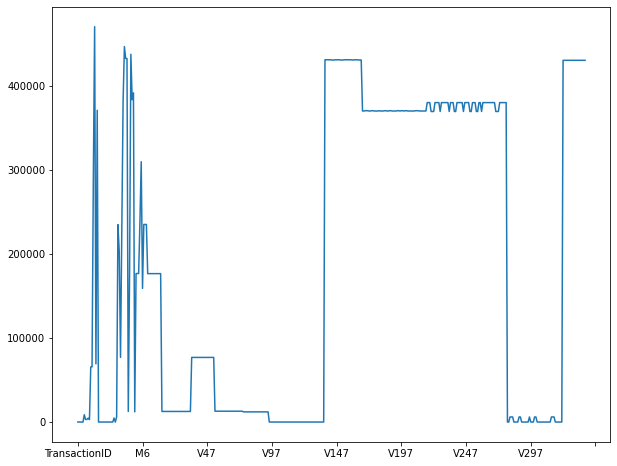

In [50]:
plt.figure(figsize=(10,8))
n_nan_trs.plot()

Separar por Produto